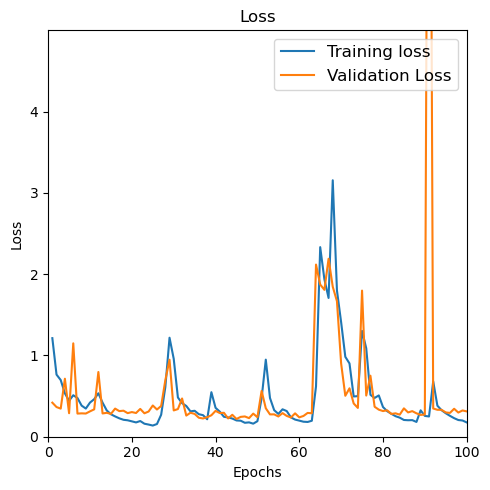

In [1]:
import wandb
api = wandb.Api()

#Get your run

#run = api.run("tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/xt3bahti") # 5 epochs
#run = api.run("tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/prjpfp0c") # 10 epochs
#run = api.run("tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/rk20hbe0") # 20 epochs
run = api.run("tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/jznezlwd") # 100 epochs

#Get the history of your run
history = run.scan_history()

# Create normalized data (mapping to 100 epochs)
train_losses = [point['train_loss'] for point in history if 'train_loss' in point]

val_losses = [point['validation_loss'] for point in history if 'validation_loss' in point]
# Scale to 100 epochs
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import pandas as pd

# Create pandas Series and drop NaN values
train_series = pd.Series(train_losses).dropna()
val_series = pd.Series(val_losses).dropna()

# Get the clean values and create new indices
train_losses_clean = train_series.values
val_losses_clean = val_series.values


# Calculate means of chunks
def chunk_mean(arr, chunk_size):
    return np.array([np.mean(arr[i:i+chunk_size]) for i in range(0, len(arr), chunk_size)])

# Process training losses - mean of every 125 points
train_losses_mean = chunk_mean(train_losses_clean, 125)
train_epochs_mean = np.arange(1,len(train_losses_mean)+1)

# Process validation losses - mean of every 42 points
val_losses_mean = chunk_mean(val_losses_clean, 42)
val_epochs_mean = np.arange(1,len(val_losses_mean)+1)

# Plotting
plt.figure(figsize=(5, 5))
plt.ylim(0, 5)
plt.xlim(1, len(train_losses_mean))
plt.plot(train_epochs_mean, train_losses_mean, label='Training loss')
plt.plot(val_epochs_mean, val_losses_mean, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right', fontsize=12)
#plt.xticks(np.arange(0, len(train_losses_mean) + 1, 2))  # Creates ticks at each integer position
plt.xticks(np.arange(0, len(train_losses_mean) +1, 20))  # Creates ticks at each integer position
plt.yticks(np.arange(0, 5, 1))  # Creates ticks at each integer position
plt.tight_layout()
plt.show()


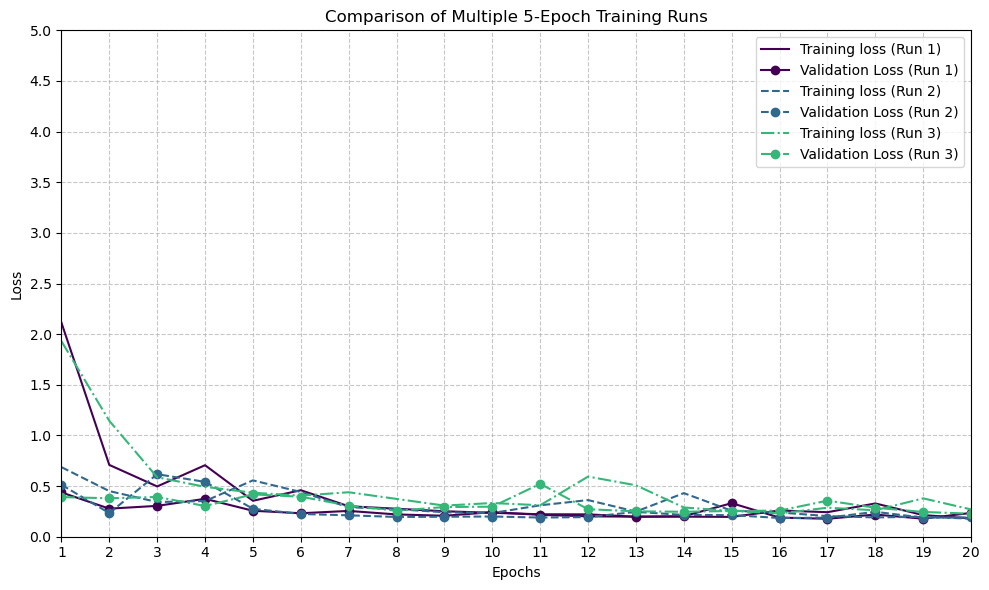

In [18]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

api = wandb.Api()

epochs = 20  # Number of epochs for the runs you want to compare

# Define multiple runs with the same number of epochs (5 epochs in this example)
# You can replace these with your actual 5-epoch run IDs
# runs = [
#     {"run_id": "71nsiy3n", "name": "Run 1", "line_style": "-"},
#     {"run_id": "jo78qbit", "name": "Run 2", "line_style": "--"},  # Replace with actual run ID
#     {"run_id": "sp2bnpl8", "name": "Run 3", "line_style": "-."}   # Replace with actual run ID
# ]
# Define multiple runs with the same number of epochs (20 epochs in this example)
runs = [
    {"run_id": "tbmwhm42", "name": "Run 1", "line_style": "-"}, 
    {"run_id": "48hrx6n4", "name": "Run 2", "line_style": "--"},  # Replace with actual run ID
    {"run_id": "rk20hbe0", "name": "Run 3", "line_style": "-."}   # Replace with actual run ID
]

# Initialize lists to store mean values of 3 runs
# train_losses_3_runs_mean = [0,0,0,0,0]
# val_losses_3_runs_mean = [0,0,0,0,0]

# Setting up the plot
plt.figure(figsize=(10, 6))
plt.ylim(0, 5)

# Process each run
for i, run_info in enumerate(runs):
    # Get run data
    run = api.run(f"tmv641-tampere-university/Thesis_datasplit_60_20_20_experimentation/{run_info['run_id']}")
    history = run.scan_history()
    
    # Extract loss values
    train_losses = [point['train_loss'] for point in history if 'train_loss' in point]
    val_losses = [point['validation_loss'] for point in history if 'validation_loss' in point]
    
    # Clean data
    train_series = pd.Series(train_losses).dropna()
    val_series = pd.Series(val_losses).dropna()
    
    train_losses_clean = train_series.values
    val_losses_clean = val_series.values
    
    # Calculate means of chunks - adjust chunk sizes based on your data
    def chunk_mean(arr, chunk_size):
        return np.array([np.mean(arr[i:i+chunk_size]) for i in range(0, len(arr), chunk_size)])
    
    # For 5-epoch runs, adjust these chunk sizes based on your data points per epoch
    train_chunk_size = len(train_losses_clean) // epochs  # Adjust to get 1 point per epoch
    val_chunk_size = len(val_losses_clean) // epochs      # Adjust to get 1 point per epoch
    
    # Process losses
    train_losses_mean = chunk_mean(train_losses_clean, train_chunk_size)
    train_epochs_mean = np.arange(1, len(train_losses_mean)+1)
    
    val_losses_mean = chunk_mean(val_losses_clean, val_chunk_size)
    val_epochs_mean = np.arange(1, len(val_losses_mean)+1)
    
    # Use different colors for different runs
    color = plt.cm.viridis(i/len(runs))
    # Accumulate mean losses for averaging later
    if i == 0:
        train_losses_3_runs_mean = np.zeros_like(train_losses_mean)
        val_losses_3_runs_mean = np.zeros_like(val_losses_mean)
    train_losses_3_runs_mean += train_losses_mean
    val_losses_3_runs_mean += val_losses_mean
    
    
    # Plot the data
    plt.plot(train_epochs_mean, train_losses_mean, 
             color=color, linestyle=run_info["line_style"], 
             label=f'Training loss ({run_info["name"]})')
    
    plt.plot(val_epochs_mean, val_losses_mean, 
             color=color, linestyle=run_info["line_style"], marker='o', 
             label=f'Validation Loss ({run_info["name"]})')

# Configure plot aesthetics
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Multiple 5-Epoch Training Runs')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Set the x-ticks to match the number of epochs
plt.xlim(1, epochs)
plt.xticks(np.arange(1, epochs+1, 1))  # Ticks for epochs 1-5
plt.yticks(np.arange(0, 5.1, 0.5))

plt.tight_layout()
plt.savefig('multi_5epoch_comparison.png', dpi=300)
plt.show()

# Average the losses across the 3 runs
train_losses_3_runs_mean /= len(runs)
val_losses_3_runs_mean /= len(runs)

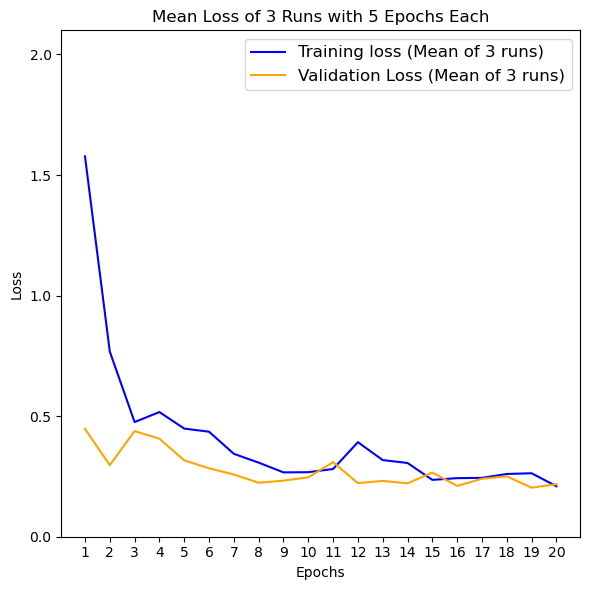

In [22]:
plt.figure(figsize=(6, 6))
# Plot the mean of the 3 runs
plt.ylim(0, 2.1)
plt.plot(train_epochs_mean, train_losses_3_runs_mean, label='Training loss (Mean of 3 runs)', color='blue')
plt.plot(val_epochs_mean, val_losses_3_runs_mean, label='Validation Loss (Mean of 3 runs)', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mean Loss of 3 Runs with 5 Epochs Each')
plt.legend(loc='upper right', fontsize=12)
plt.xticks(np.arange(1, epochs+1, 1))  # Ticks for epochs 1-5
plt.yticks(np.arange(0, 2.1, 0.5))
plt.tight_layout()
plt.savefig('mean_3runs_5epochs.png', dpi=300)
plt.show()